<a href="https://colab.research.google.com/github/greenmantice18/Internship-AIML/blob/main/Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION**


Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


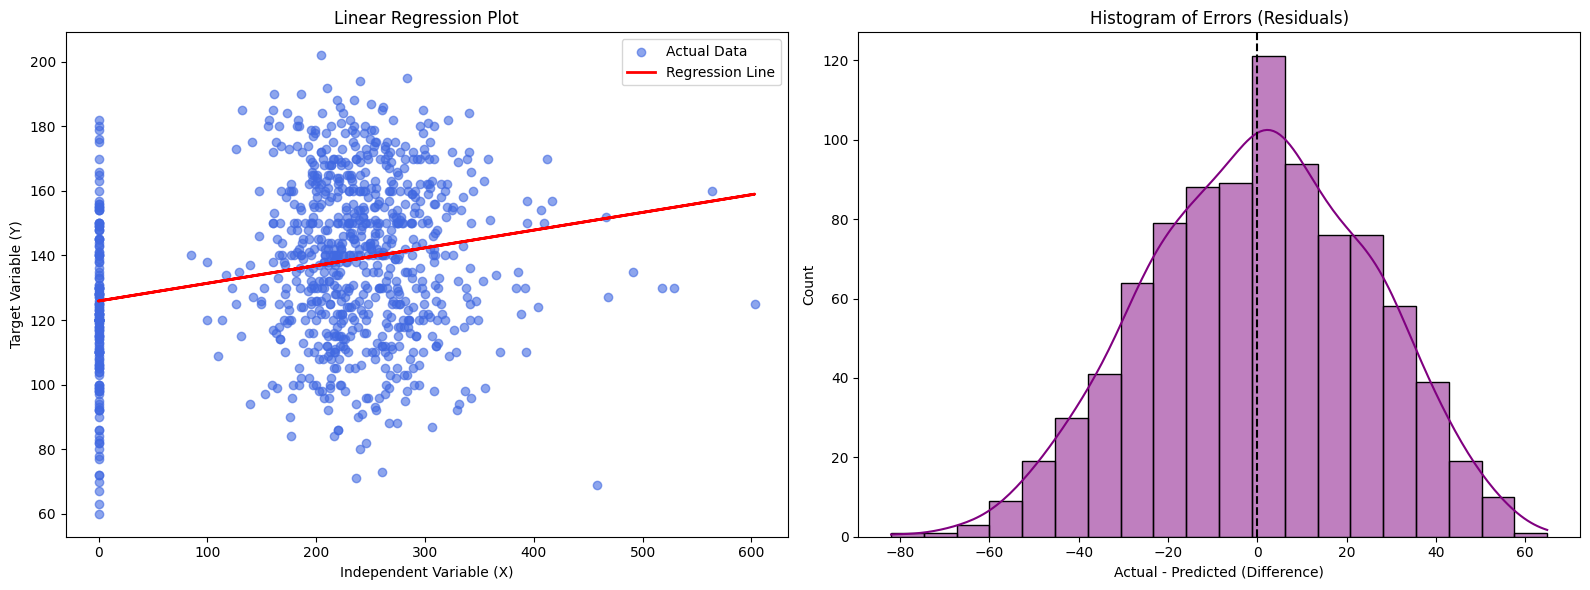

--- Final Dataset Table ---
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease   Predicted  Difference  
0              N      0.0       Up             0  141.759858   30.240142  
1              N      1.0     Flat             1  135.777588   20.222412  
2              N      0.0       Up             0  141.430559  -43.430559  
3              Y      1.5     Flat             1  137.643617  -29.643617  
4              N      0.0       Up             0  136.600836  -14.600836  


In [1]:
import kagglehub
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. LOAD YOUR DATA
file_path = 'output.csv'
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

# 2. DEFINE X AND Y
X = df[['Cholesterol']].values
y_actual = df['MaxHR'].values

# 3. TRAIN THE MODEL & PREDICT
model = LinearRegression()
model.fit(X, y_actual)
y_pred = model.predict(X)

# 4. CALCULATE DIFFERENCES
df['Predicted'] = y_pred
df['Difference'] = y_actual - y_pred

#  VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature 1: Linear Nature & Prediction vs Actual
axes[0].scatter(X, y_actual, color='royalblue', alpha=0.6, label='Actual Data')
axes[0].plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_title('Linear Regression Plot')
axes[0].set_xlabel('Independent Variable (X)')
axes[0].set_ylabel('Target Variable (Y)')
axes[0].legend()

# Histogram of Errors
sns.histplot(df['Difference'], kde=True, ax=axes[1], color='purple')
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title('Histogram of Errors (Residuals)')
axes[1].set_xlabel('Actual - Predicted (Difference)')

plt.tight_layout()
plt.show()

# SHOW DATASET (Requirement 4)
print("--- Final Dataset Table ---")
print(df.head())